In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X_test[0].shape

(28, 28)

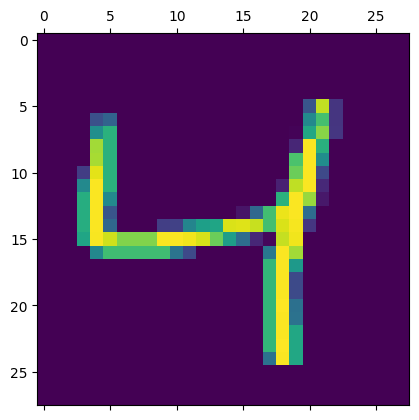

In [7]:
plt.matshow(X_train[2])
# plt.gray()
plt.show()

In [8]:
y_train[1]

0

In [9]:
y_test[0]

7

In [10]:
len(y_train)

60000

In [11]:
y_train[2]

4

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train_flattened =X_train.reshape(len(X_train), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_train_flattened.shape

(60000, 784)

In [16]:
X_test.shape

(10000, 28, 28)

In [17]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [18]:
X_test_flattened.shape

(10000, 784)

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])

In [20]:
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2316 - accuracy: 0.9362
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9359
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9356
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2300 - accuracy: 0.9367
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2301 - accuracy: 0.9363


In [29]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2806 - accuracy: 0.9263


[0.2806124985218048, 0.9262999892234802]

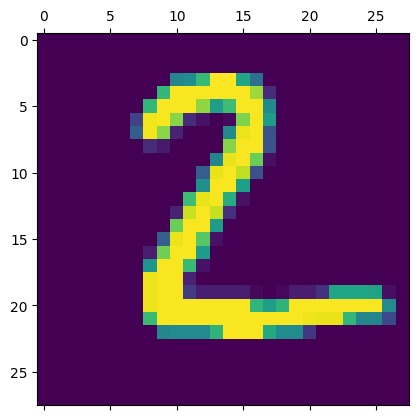

In [39]:
plt.matshow(X_test[1])

In [31]:
y_predict = model.predict(X_test_flattened)

313/313 [==============================] - 1s 3ms/step


In [32]:
y_predict

array([[2.7565711e-06, 3.0527555e-12, 3.4574456e-05, ..., 9.9987364e-01,
        5.0092679e-02, 6.5865630e-01],
       [1.6720649e-02, 2.1285352e-03, 9.9957967e-01, ..., 7.0854090e-24,
        3.5624227e-03, 7.9188392e-22],
       [2.2844397e-05, 9.9554741e-01, 6.7058641e-01, ..., 1.2214336e-04,
        2.6009309e-01, 3.1379271e-02],
       ...,
       [1.2186325e-07, 9.3280477e-09, 2.9260525e-04, ..., 9.2700489e-02,
        5.4553968e-01, 8.4318000e-01],
       [1.8587519e-08, 7.5966526e-08, 1.1287836e-07, ..., 1.4148808e-06,
        3.6175233e-01, 8.9797382e-08],
       [2.7746114e-06, 4.2078791e-14, 5.4414552e-02, ..., 7.7631910e-21,
        8.7715186e-09, 1.0808363e-13]], dtype=float32)

In [33]:
y_predict[0]

array([2.7565711e-06, 3.0527555e-12, 3.4574456e-05, 9.5614684e-01,
       2.1231835e-04, 1.0872417e-01, 1.2047030e-12, 9.9987364e-01,
       5.0092679e-02, 6.5865630e-01], dtype=float32)

In [38]:
np.argmax(y_predict[1])

2